In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

books = pd.read_csv(r"C:\Users\ASYIKIN\OneDrive\Desktop\PYTHON FOR DATA ANALYSIS\PROJECTS\Book\Goodreads.csv")
books.head()

,ID,Title,Author,Fiction,Genre,Gender,Origin,Language,Pages,Year Published,Centuries,Nobel Prize
0,1,1984,George Orwell,Fiction,Dystopian,male,UK,English,368,1949,20th,NaN
1,2,100 Headlines That Changed the World,James Maloney,Non-fiction,History,male,UK,English,309,2012,21st,NaN
2,3,20 Principles,Hassan Al Banna,Non-fiction,Faith,male,Egypt,Arabic,200,1940,20th,NaN
3,4,30-Second Psychology,Christian Jarrett,Non-fiction,Psychology,male,UK,English,160,2011,21st,NaN
4,5,30-Second Religion,Russell Re Manning,Non-fiction,Faith,male,UK,English,160,2011,21st,NaN


**Basic data exploration**

- head() - first few rows
- info() - basic info about dataset
- describe() - summary statistics

In [4]:
books.columns

Index(['ID', 'Title', 'Author', 'Fiction', 'Genre', 'Gender', 'Origin',
       'Language', 'Pages', 'Year Published', 'Centuries', 'Nobel Prize'],
      dtype='object')

In [6]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              100 non-null    int64 
 1   Title           100 non-null    object
 2   Author          100 non-null    object
 3   Fiction         100 non-null    object
 4   Genre           100 non-null    object
 5   Gender          100 non-null    object
 6   Origin          100 non-null    object
 7   Language        100 non-null    object
 8   Pages           100 non-null    int64 
 9   Year Published  100 non-null    int64 
 10  Centuries       100 non-null    object
 11  Nobel Prize     3 non-null      object
dtypes: int64(3), object(9)
memory usage: 9.5+ KB


# Univariate Analysis

- examining on evariable at a time to understand its distribution, central tendency and dispersion

- It's fundamental technique in DA used to summarize and describe the characterisitc of a data set

- Columns analyzed:
    1) Numerical (Page, year published)
    2) Categorical (Genre, Gender, Language)


**Numerical Column**
- Year Published

- Pages

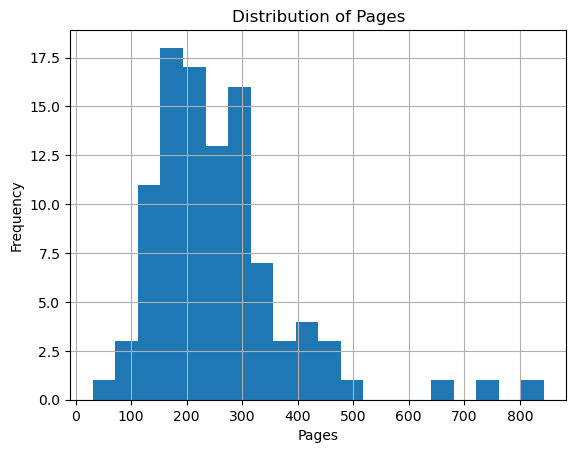

In [8]:
# Histograms
books['Pages'].hist(bins=20)
plt.title('Distribution of Pages')
plt.xlabel('Pages')
plt.ylabel('Frequency')
plt.show()

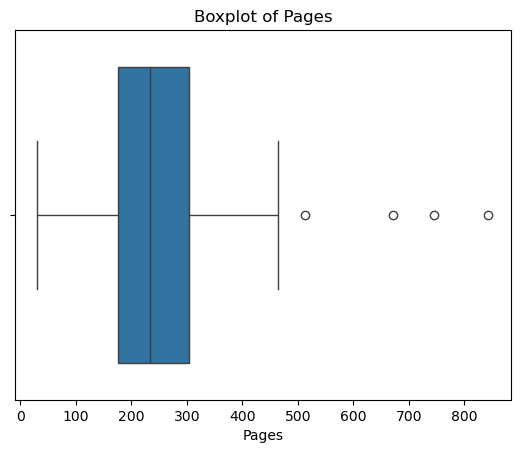

In [9]:
# box plots
sns.boxplot(x=books['Pages'])
plt.title('Boxplot of Pages')
plt.show()

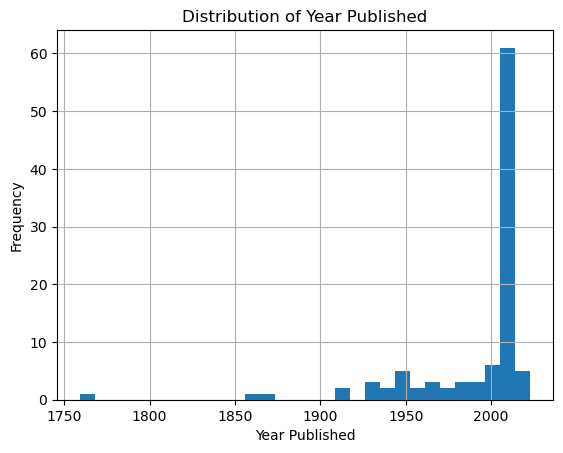

In [10]:
# Year published
books['Year Published'].hist(bins=30)
plt.title('Distribution of Year Published')
plt.xlabel('Year Published')
plt.ylabel('Frequency')
plt.show()

**Categorical Columns**

- Genre
- Gender
- Language

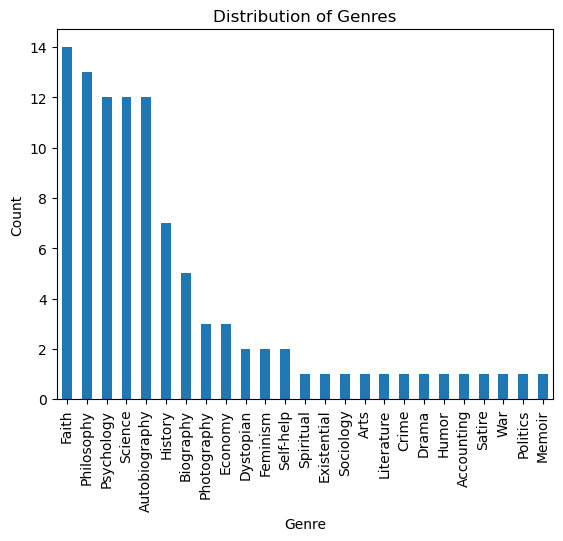

In [11]:
#bar plot
books['Genre'].value_counts().plot(kind='bar')
plt.title('Distribution of Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

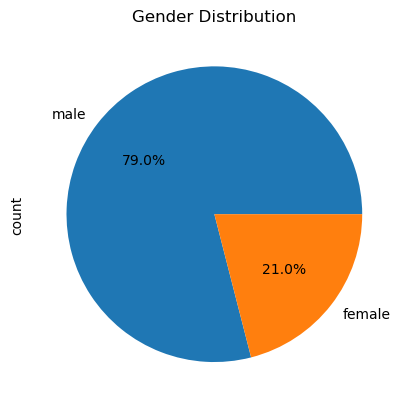

In [12]:
# pie chart
books['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()

# Bivariate Anaysis

- Explore relationships between two variables

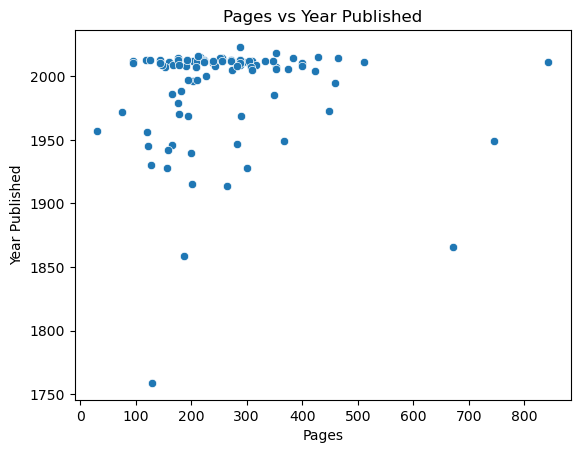

In [13]:
# scatter plot
sns.scatterplot(x='Pages', y='Year Published', data=books)
plt.title('Pages vs Year Published')
plt.show()

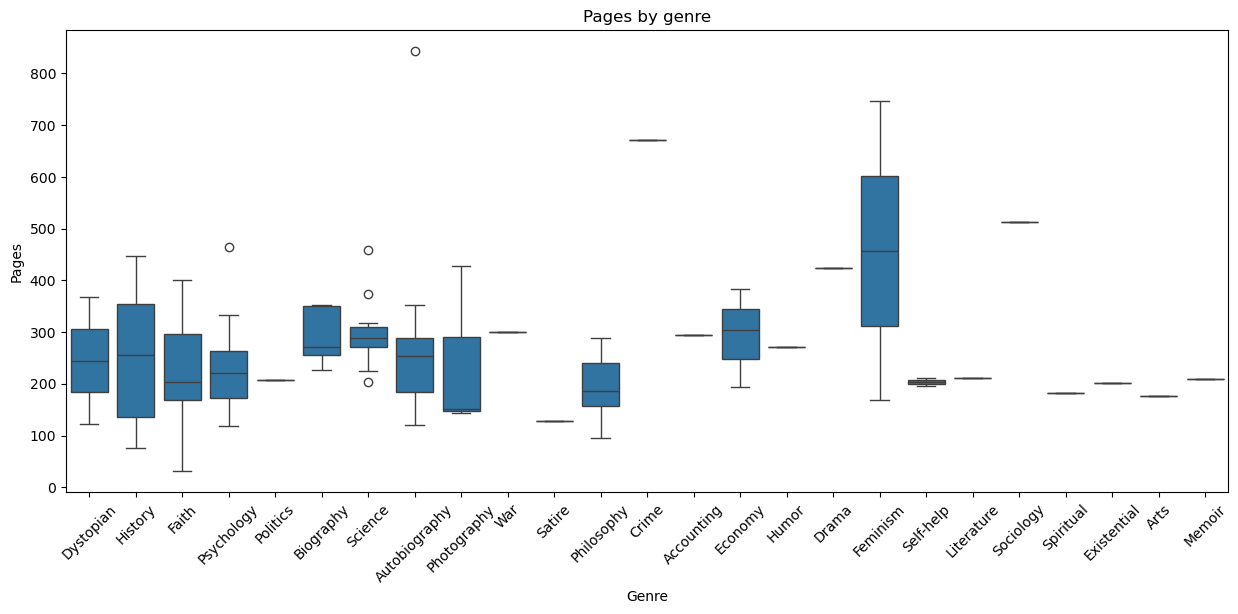

In [16]:
# box plot with categorical variable
plt.figure(figsize=(15, 6))
sns.boxplot(x='Genre', y='Pages', data=books)
plt.title('Pages by genre')
plt.xticks(rotation=45)
plt.show()

In [18]:
books.columns

Index(['ID', 'Title', 'Author', 'Fiction', 'Genre', 'Gender', 'Origin',
       'Language', 'Pages', 'Year Published', 'Centuries', 'Nobel Prize'],
      dtype='object')

# Categorical Data Analysis

In [19]:
#cross-tabulation
cross_tab = pd.crosstab(books['Genre'], books['Gender'])
print(cross_tab)

Gender         female  male
Genre                      
Accounting          1     0
Arts                1     0
Autobiography       7     5
Biography           1     4
Crime               0     1
Drama               1     0
Dystopian           0     2
Economy             0     3
Existential         0     1
Faith               2    12
Feminism            2     0
History             2     5
Humor               0     1
Literature          0     1
Memoir              0     1
Philosophy          1    12
Photography         0     3
Politics            0     1
Psychology          2    10
Satire              0     1
Science             1    11
Self-help           0     2
Sociology           0     1
Spiritual           0     1
War                 0     1


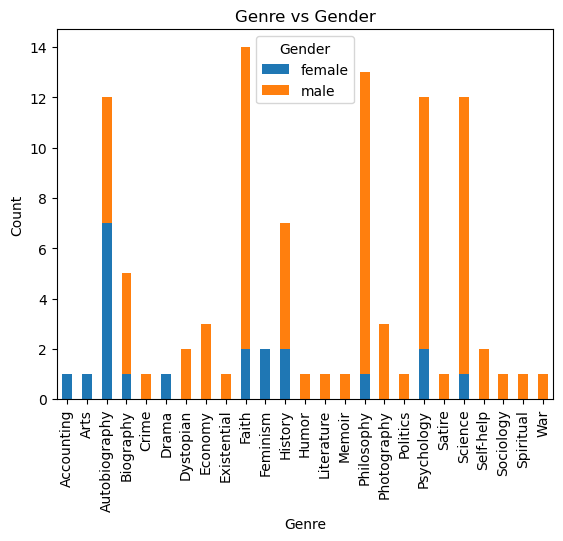

In [24]:
# stacked bar chart

cross_tab.plot(kind='bar', stacked=True)
plt.title('Genre vs Gender')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

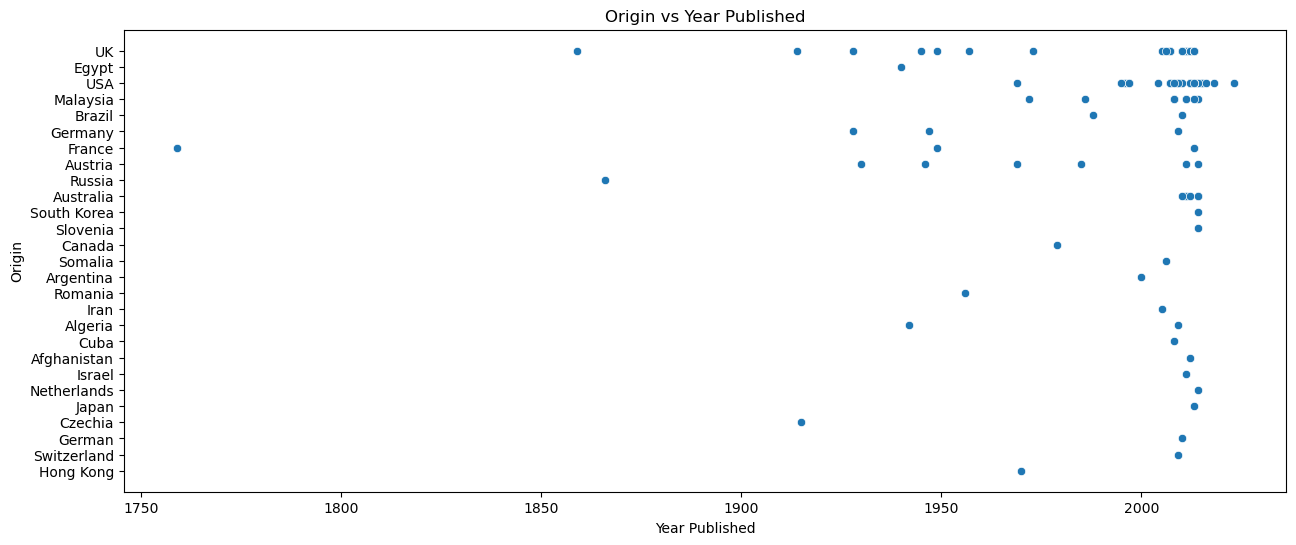

In [27]:
# scatter plot
plt.figure(figsize=(15, 6))

sns.scatterplot(x='Year Published', y='Origin', data=books)
plt.title('Origin vs Year Published')
plt.show()

# PLOTLY

1) Bar Chart
    - genre
    - author
    - Langauge
    - Publication Year

2) Pie Chart
    - Genre Distribution
    - Gender Distribution

3) Histogram
    - Pages Distribution
    - Year Published

4) Scatter Plot
    - Pages vs year published 
    - Year published vs nobel prize

5) Box Plot
    - Pages by genre
    = Page by gender

6) Sunburst Chart

7) Treemap
    - Books by genre and author

8) Heatmap
    - Books by year and Genre

9) Facet Grid
    - Create a grid ofplots to compare different genres or languages

10) Bubble Chart
    - Visualize books as bubbles with size representing pages and color representing genre


In [29]:
# bar chart

import plotly.express as px
fig = px.bar(books, x='Genre', title='Number of books by Genre')
fig.show()



In [32]:
# count the number of books per language
# rename the column 'count'
books_count = books['Language'].value_counts().reset_index()
books_count.columns = ['Language', 'Count']

# sort the dataframe in descending order
books_count = books_count.sort_values(by='Count', ascending=False)

import plotly.express as px
fig = px.bar(books_count, x='Language', y='Count', title='Number of books by original language')
fig.show()


In [33]:
#Count the number of books published by centuries
# rename the new column
century_count = books['Centuries'].value_counts().reset_index()
century_count.columns = ['Centuries', 'Count']

fig = px.bar(century_count, x='Centuries', y='Count', title='Number of books published by years (Centuries)')
fig.show()


In [42]:
# Gender distribution

fig = px.pie(books, names='Gender', title='Gender Distribution')

fig.update_layout(
    width=350,
    height=400
)

fig.show()

In [43]:
# Year published

fig = px.pie(books, names='Centuries', title='Publication year (Centuries)')

fig.update_layout(
    width=350,
    height=400
)

fig.show()

In [44]:
# Histogram
fig = px.histogram(books, x='Pages', title='Distribution of Pages')
fig.show()


In [45]:
# Histogram
fig = px.histogram(books, x='Year Published', title='Distribution of Publication Year')
fig.show()

In [46]:
# Histogram
fig = px.histogram(books, x='Genre', title='Distribution of Genre')
fig.show()

In [47]:
# Histogram
fig = px.histogram(books, x='Origin', title='Distribution of Author\'s Origin')
fig.show()

In [49]:
# scattter plot
fig = px.scatter(books, x='Year Published', y='Pages', title='Pages vs Year Published')
fig.show()

In [59]:
# scattter plot
fig = px.scatter(books, x='Origin', y='Year Published', title='Origin vs Year Published')
fig.show()

In [63]:
# box plot

fig = px.box(books, x='Genre', y='Pages', title='Page Length by Genre')
fig.show()

In [64]:
fig = px.box(books, x='Gender', y='Pages', title='Page Length by Gender')
fig.show()

In [68]:
# treemap
fig = px.treemap(books, path=['Genre', 'Title', 'Author'], values='ID', title='Books by Genre and Author')
fig.show()

In [71]:
# heatmap

# Calculate the counts of ID
heatmap_data = books.groupby(['Year Published', 'Genre']).size().reset_index(name='Count')

fig=px.density_heatmap(heatmap_data, x='Year Published', y='Genre', z='Count', title='Books by Year and Genre')
fig.show()

In [75]:
#Bubble chart
fig = px.scatter(books, x='Year Published', y='Origin', color='Genre', size='Pages', title='Books Bubble Chart')
fig.show()